In [9]:
# -----------------------------------------------------------
# Simulates different quantities of a surface pushed along its 
# normal lines in the Euclidean case.
#
# (C) 2022 Florian Babisch, Tübingen, Germany
# Released under CC-BY license
# email flofe@t-online.de
# -----------------------------------------------------------

# This code uses the numpy convention for docstrings

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, HBox, VBox, Layout, Dropdown
from IPython.display import display
import ipywidgets as widgets
import sympy as sy
from sympy import *


In [11]:
# SymPy symbols
# In the following x cannot be used as a variable for anything else!
x = Symbol('x')

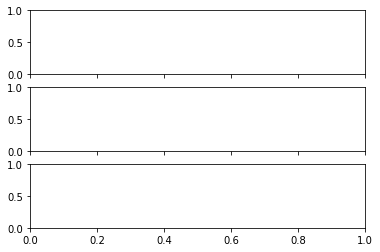

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

In [13]:
def unit_tangent_vector(xValues, func, s):
    """Calculates the components of the normalized tangential vector of an 
        initial surfaces pushed along its normals.

        Parameters
        ----------
        xValues : list
            List of x-values.
        func : SymPy type
            Function that characterizes the initial surface.
        s : float
            Value of how far the initial surface is pushed along the normals.

        Returns
        -------
        tuple 
            Normalized components of the tangent vector.
    """
    funcPrime = func.diff(x)
    func2Prime = funcPrime.diff(x)
    npFunc = lambdify(x, func, 'numpy')
    npFuncPrime = lambdify(x, funcPrime, 'numpy')
    npFunc2Prime = lambdify(x, func2Prime, 'numpy')
    denom = (1 + npFuncPrime(xValues)**2)**(3 / 2)
    # signed curvature
    k = npFunc2Prime(xValues) / denom
    # critical coefficient
    A = 1 -  k * s
    c1 = A
    c2 = A * npFuncPrime(xValues)
    norm = np.sqrt(c1**2 + c2**2)
    nc1 = c1 / norm
    nc2 = c2 / norm
    return nc1, nc2

def critical_coeff(xValues, func, s):
    """Calculates the values of the critical coefficient as well as the 
        the signed curvature and chi which is the critical coefficient 
        divided by its absolute value.

        Parameters
        ----------
        xValues : list
            List of x-values.
        func : SymPy type
            Function that characterizes the initial surface.
        s : float
            Value of how far the initial surface is pushed along the normals.
     """
    funcPrime = func.diff(x)
    func2Prime = funcPrime.diff(x)
    npFuncPrime = lambdify(x, funcPrime, 'numpy')
    npFunc2Prime = lambdify(x, func2Prime, 'numpy')
    denom = (1 + npFuncPrime(xValues)**2)**(3 / 2)
    k = npFunc2Prime(xValues) / denom
    A = 1 - k * s
    chi = A / np.abs(A)
    return A, chi, k

def save_plot(fig, axis, filename):
    """Save the current figure as .pdf and .eps.

        Parameters
        ---------
        fig : matplotlib.figure.Figure
            Holds all plot elements.
        axis : matplotlib.axes._subplots.AxesSubplot
            The subplot which will be saved.
        filename : str
            Name under which the images are saved.

    """
    fig.savefig('figures/tangent-'+filename+'.pdf', bbox_inches='tight')
    fig.savefig('figures/tangent-'+filename+'.eps', bbox_inches='tight', format='eps', dpi=1200)

In [14]:
def plotting(
    input,
    inputSaveFileName,
    s=0,
    valueLimit=5,
    saveFile=False,
    ):
    """Is the method regularly called by the interact method.
        Modifies the initial figure by giving it a title etc., handles the user inputs,
        controls the different choices,
        displays the plot.

        Parameters
        ----------
        input : str
            User input that is used as the function that characterizes the initial surface.
        inputSaveFileName : str
            Name that is used when saving a plot.
        s : float
            Parameter of how far the initial surface should be pushed along the normals.
        valueLimit : integer
            Interval limit for the x-values.
        saveFile : boolean
            If True the plot that it shown after pressing the 'Run interact' button is saved under the name written in the
            'Name of Image' textbox.
    """
    xValues = np.arange(-valueLimit, valueLimit, 0.01)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax3.set_xlabel(r'$x$', fontsize=16)
    ax1.set_ylabel(r'${T}_0(s,x)$', fontsize=16)
    ax2.set_ylabel(r'${T}_1(s,x)$', fontsize=16)
    ax2.set_xticks(np.arange(-valueLimit, valueLimit+1, .5))
    #plt.subplots_adjust(top=0.8)
    function = x**2
    try:
        function = eval(input)
    except Exception:
        # iInore error that appears when not done writing
        pass
    xtangent, ytangent = unit_tangent_vector(xValues, function, s)
    A, chi, k = critical_coeff(xValues, function, s)
    ax1.plot(xValues, xtangent)
    ax2.plot(xValues, ytangent)
    ax3.plot(xValues, A, label=r'$\mathcal{A}$')
    ax3.plot(xValues, chi, label=r'$\chi$')
    ax3.plot(xValues, k, label=r'$k$')
    #ax3.plot(values, np.zeros(len(values)), color='black')

    ax3.legend(fontsize=12, loc="best")
    
    # Save plots
    if saveFile == True:
        filename = str(inputSaveFileName)
        save_plot(fig, ax1, filename)
    
    # Display figure
    display(fig)
    ax1.cla()
    ax2.cla()
    ax3.cla()

In [15]:
def main():
    # Style such that whole text fits
    style = {'description_width': 'initial'}
    interact_manual(plotting,
        input = widgets.Text(
            value='x**2',
            placeholder='Initial Function, e.g. x**2',
            description='Initial Function:',
            disabled=False,
            style=style
        ),
        valueLimit = widgets.IntSlider(min=1, max=20, step=1, description='Max. x-Value:', style=style),
        s = widgets.FloatSlider(min=-20, max = 20, step = 0.1, description='s', style=style),
        saveFile = widgets.Checkbox(value=False, description='Save File', style=style),
        inputSaveFileName = widgets.Text(
            placeholder='Insert Name of Image',
            description='Name of Image',
            disabled=False,
            style=style
        ),
    )

In [16]:
main()

interactive(children=(Text(value='x**2', description='Initial Function:', placeholder='Initial Function, e.g. …